# PREDICTING HOUSE PRICE BY POLYNOMIAL REGRESSION

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error

    We took housedata from kaggle of delhi region 

In [92]:
df=pd.read_csv('Delhi_house_data.csv')
df

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0
...,...,...,...,...,...,...,...,...,...,...,...
1254,4118.0,4,5.0,Unfurnished,Chittaranjan Park,3.0,55000000,Ready_to_move,New_Property,Builder_Floor,12916.0
1255,1050.0,3,2.0,Semi-Furnished,Chittaranjan Park,3.0,12500000,Ready_to_move,Resale,Builder_Floor,12916.0
1256,875.0,3,3.0,Semi-Furnished,Chittaranjan Park,3.0,17500000,Ready_to_move,New_Property,Builder_Floor,12916.0
1257,990.0,2,2.0,Unfurnished,Chittaranjan Park Block A,1.0,11500000,Ready_to_move,Resale,Builder_Floor,12916.0


 #DATA EXPLORATION

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         1259 non-null   float64
 1   BHK          1259 non-null   int64  
 2   Bathroom     1257 non-null   float64
 3   Furnishing   1254 non-null   object 
 4   Locality     1259 non-null   object 
 5   Parking      1226 non-null   float64
 6   Price        1259 non-null   int64  
 7   Status       1259 non-null   object 
 8   Transaction  1259 non-null   object 
 9   Type         1254 non-null   object 
 10  Per_Sqft     1018 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 108.3+ KB


In [94]:
df.isnull().sum()

Area             0
BHK              0
Bathroom         2
Furnishing       5
Locality         0
Parking         33
Price            0
Status           0
Transaction      0
Type             5
Per_Sqft       241
dtype: int64

In [95]:
df.value_counts()

Area     BHK  Bathroom  Furnishing      Locality                                Parking  Price     Status         Transaction   Type           Per_Sqft
750.0    2    2.0       Semi-Furnished  J R Designers Floors, Rohini Sector 24  1.0      5000000   Ready_to_move  New_Property  Apartment      6667.0      4
1000.0   3    2.0       Unfurnished     Virat Residency, Dwarka Mor             1.0      4620000   Ready_to_move  New_Property  Apartment      4620.0      3
540.0    2    2.0       Semi-Furnished  Adarsh Homes, Dwarka Mor                1.0      3000000   Ready_to_move  New_Property  Apartment      5000.0      3
950.0    3    2.0       Furnished       Uttam Nagar Floors, Uttam Nagar         1.0      4370000   Ready_to_move  New_Property  Apartment      4600.0      3
1775.0   3    3.0       Semi-Furnished  The Amaryllis, Karol Bagh               1.0      25500000  Almost_ready   New_Property  Apartment      14366.0     3
                                                               

FEATURE ENGINEERING

<AxesSubplot:>

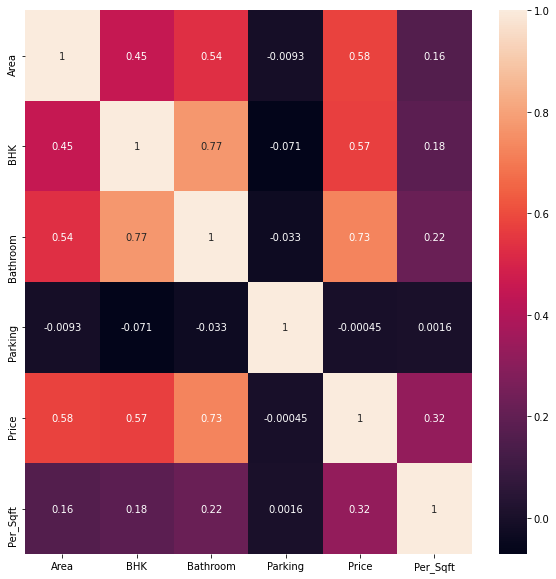

In [96]:
correlation_matrix = df.corr()

import seaborn as sns
 
plt.figure(figsize=(10,10))
sns.heatmap(data=correlation_matrix, annot=True) 

since we could see from correlation map that Parking has very low or neglible correlation with price 

In [97]:
df=df.drop("Parking",axis=1)
df

,Area,BHK,Bathroom,Furnishing,Locality,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0
...,...,...,...,...,...,...,...,...,...,...
1254,4118.0,4,5.0,Unfurnished,Chittaranjan Park,55000000,Ready_to_move,New_Property,Builder_Floor,12916.0
1255,1050.0,3,2.0,Semi-Furnished,Chittaranjan Park,12500000,Ready_to_move,Resale,Builder_Floor,12916.0
1256,875.0,3,3.0,Semi-Furnished,Chittaranjan Park,17500000,Ready_to_move,New_Property,Builder_Floor,12916.0
1257,990.0,2,2.0,Unfurnished,Chittaranjan Park Block A,11500000,Ready_to_move,Resale,Builder_Floor,12916.0


 DATA PREPROCESSING

In [100]:
df["Per_Sqft"].unique()

array([    nan,   6667.,   6154.,   6364.,   8750.,   9722.,  14444.,
        22000.,   2235.,   3800.,   4247.,   3524.,  26666.,  15972.,
       183333.,  20000.,  15556.,  16176.,   9259.,  18507.,   7000.,
        72000.,  43000.,   4444.,   3300.,  40000.,   5185.,   4000.,
         3567.,   1259.,   2500.,   5255.,   6528.,   6875.,   5714.,
         7449.,   8125.,   7931.,   5789.,   6471.,   8438.,   6508.,
         8000.,   6000.,   6250.,   6333.,   6714.,  28797.,  23840.,
         4600.,   4620.,   5000.,   6111.,  25512.,  22222.,  24718.,
        30556.,  18750., 120000.,  15459.,  23529.,  16667.,  11111.,
        21409.,  95000.,  15363.,  19259.,  20833.,  20930.,   6526.,
         3901.,   6347.,  41304.,   8701.,   5556.,  85715.,   6944.,
         7222.,  11220.,   5357.,   6706.,  10288.,  28283.,   8923.,
         8222.,  14550.,  30093.,  35714.,  22857.,  12500.,   4040.,
         7778.,  32000.,   5666.,  11667., 112179.,   6584.,   5794.,
         7500., 1600

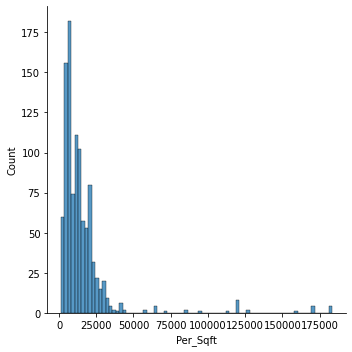

In [101]:
sns.displot(df.Per_Sqft)

The data is skewed so we will replace the missing values with median 

In [102]:
median_value = df["Per_Sqft"].median()

In [103]:
df["Per_Sqft"].fillna(value = median_value,inplace=True)

In [104]:
df.isnull().sum()

Area           0
BHK            0
Bathroom       2
Furnishing     5
Locality       0
Price          0
Status         0
Transaction    0
Type           5
Per_Sqft       0
dtype: int64

In [105]:
df = df.dropna()
df.isnull().sum()

Area           0
BHK            0
Bathroom       0
Furnishing     0
Locality       0
Price          0
Status         0
Transaction    0
Type           0
Per_Sqft       0
dtype: int64

In [106]:
df["Status"].unique()

array(['Ready_to_move', 'Almost_ready'], dtype=object)

In [109]:
df.groupby("Status")["Status"].agg('count')

Status
Almost_ready       75
Ready_to_move    1177
Name: Status, dtype: int64

In [111]:
df.Status = df.Status.apply(lambda x:1 if x=="Ready_to_move" else 0)

In [112]:
df["Transaction"].unique()

array(['New_Property', 'Resale'], dtype=object)

In [113]:
df.groupby("Transaction")["Transaction"].agg('count')

Transaction
New_Property    478
Resale          774
Name: Transaction, dtype: int64

In [115]:
df.Transaction = df.Transaction.apply(lambda x:1 if x=="New_Property" else 0)

In [116]:
df["Type"].unique()

array(['Builder_Floor', 'Apartment'], dtype=object)

In [117]:
df.groupby("Type")["Type"].agg('count')

Type
Apartment        591
Builder_Floor    661
Name: Type, dtype: int64

In [118]:
df.Type= df.Type.apply(lambda x:1 if x=="Builder_Floor" else 0)

In [119]:
df["Furnishing"].unique()

array(['Semi-Furnished', 'Furnished', 'Unfurnished'], dtype=object)

In [120]:
df.groupby("Furnishing")["Furnishing"].agg('count')

Furnishing
Furnished         183
Semi-Furnished    708
Unfurnished       361
Name: Furnishing, dtype: int64

In [121]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit_transform(df["Furnishing"])

array([1, 1, 0, ..., 1, 2, 2])

In [122]:
dummy_cols = pd.get_dummies(df.Locality)
df = pd.concat([df,dummy_cols], axis='columns')

In [123]:
df.head(10)

,Area,BHK,Bathroom,Furnishing,Locality,Price,Status,Transaction,Type,Per_Sqft,...,"Vijay Enclave, Mahavir Enclave","Vijay Vihar, Rohini","Vikram Vihar, Lajpat Nagar","Vinoba Puri, Lajpat Nagar","Virat Residency, Dwarka Mor","Vishwas Nagar, Shahdara","Yamuna Apartment, Alaknanda","Yamuna Vihar, Shahdara","Zakir Nagar, New Friends Colony","mind. The space is airy, is well located and can be easily customized as per the needs. Prime facilities are easily accessible from this place with Government Girls Senior Secondary School No 2 (0 km ). Other key neighbourhood are B Block Market (0 km ). read more Contact Owner View Phone No. Share Feedback Owner vinod kumar"
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,6500000,0,0,1,11291.5,...,0,0,0,0,0,0,0,0,0,0
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",5000000,0,0,0,6667.0,...,0,0,0,0,0,0,0,0,0,0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",15500000,0,0,0,6667.0,...,0,0,0,0,0,0,0,0,0,0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,4200000,0,0,1,6667.0,...,0,0,0,0,0,0,0,0,0,0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,6200000,0,0,1,6667.0,...,0,0,0,0,0,0,0,0,0,0
5,1300.0,4,3.0,Semi-Furnished,Rohini Sector 24,15500000,0,0,1,6667.0,...,0,0,0,0,0,0,0,0,0,0
6,1350.0,4,3.0,Semi-Furnished,Rohini Sector 24,10000000,0,0,1,6667.0,...,0,0,0,0,0,0,0,0,0,0
7,650.0,2,2.0,Semi-Furnished,"Delhi Homes, Rohini Sector 24",4000000,0,0,0,6154.0,...,0,0,0,0,0,0,0,0,0,0
8,985.0,3,3.0,Unfurnished,Rohini Sector 21,6800000,0,0,1,6154.0,...,0,0,0,0,0,0,0,0,0,0
9,1300.0,4,4.0,Semi-Furnished,Rohini Sector 22,15000000,0,0,1,6154.0,...,0,0,0,0,0,0,0,0,0,0


In [124]:
X = df
Y = df["Price"]

In [125]:
X = X.apply(pd.to_numeric,errors="coerce")
Y = Y.apply(pd.to_numeric,errors="coerce")
X.fillna(0,inplace = True)
Y.fillna(0,inplace = True)
poly = PolynomialFeatures(degree =2)
x_poly = poly.fit_transform(X.drop("Price", axis=1))

In [126]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.15,random_state=1)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1064, 373)
(188, 373)
(1064,)
(188,)


In [127]:
lin_model=LinearRegression()
lin_model.fit(X_train,Y_train)

LinearRegression()

In [128]:
Y_train_predict=lin_model.predict(X_train)
rmse = np.sqrt(mean_squared_error(Y_train,Y_train_predict))
print("The model performance is",rmse)
print("\n")

Y_test_predict=lin_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(Y_test,Y_test_predict))
print("The model performance is",rmse)
print("\n")

from sklearn.metrics import r2_score
print(r2_score(Y_test,Y_test_predict))

The model performance is 2.6043485716337007e-08


The model performance is 2.657479789743682e-08


1.0


Text(0, 0.5, 'Predicted')

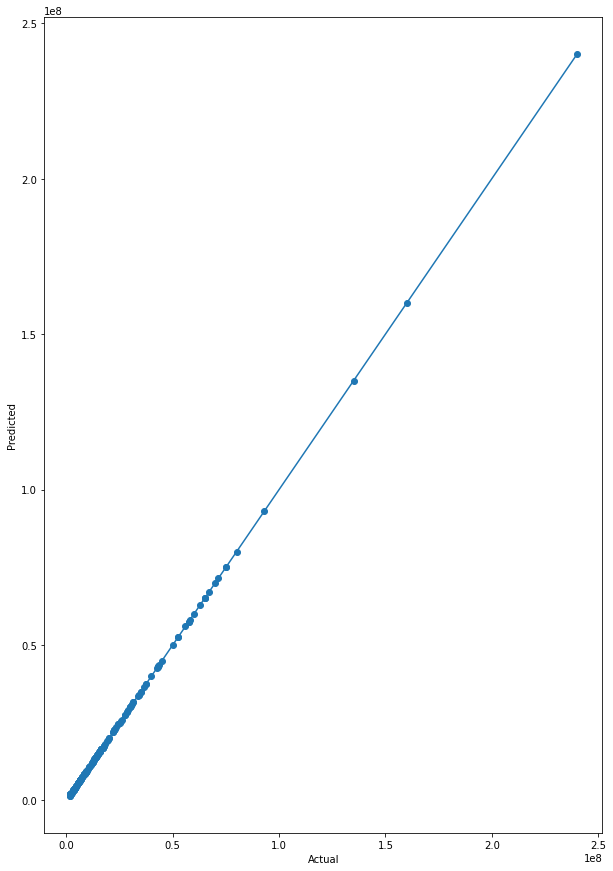

In [129]:
plt.figure(figsize=(10,15))
plt.scatter(Y_test,Y_test_predict)
plt.plot([min(Y_test_predict),max(Y_test_predict)],[min(Y_test_predict),max(Y_test_predict)])
plt.xlabel("Actual")
plt.ylabel("Predicted")